## imports and setup

In [1]:
!pip install amplpy yfinance
from amplpy import AMPL, ampl_notebook, Environment
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

ampl = ampl_notebook(
    modules=["highs", "cbc", "gurobi", "cplex"],
    license_uuid=os.getenv("AMPL_LICENSE_UUID"),
)

/usr/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Licensed to Bundle #7012.7503 expiring 20250531: AI Driven Decision Making H9AIDM, Ade Fajemisin, National College of Ireland.


sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory
sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory
sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory


## data retrival
gets the sp100's stocks' adjusted closing price

In [2]:
sp100 = [
    "AAPL", "ABBV", "ABT", "ACN", "ADBE", "AIG", "AMD", "AMGN", "AMT", "AMZN",
    "AVGO", "AXP", "BA", "BAC", "BK", "BKNG", "BLK", "BMY", "BRK-B", "C",
    "CAT", "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVS",
    "CVX", "DE", "DHR", "DIS", "DUK", "EMR", "FDX", "GD", "GE", "GILD", "GM",
    "GOOG", "GOOGL", "GS", "HD", "HON", "IBM", "INTC", "INTU", "ISRG", "JNJ",
    "JPM", "KO", "LIN", "LLY", "LMT", "LOW", "MA", "MCD", "MDLZ", "MDT",
    "MET", "META", "MMM", "MO", "MRK", "MS", "MSFT", "NEE", "NFLX", "NKE",
    "NOW", "NVDA", "ORCL", "PEP", "PFE", "PG", "PLTR", "PM", "PYPL", "QCOM",
    "RTX", "SBUX", "SCHW", "SO", "SPG", "T", "TGT", "TMO", "TMUS", "TSLA",
    "TXN", "UNH", "UNP", "UPS", "USB", "V", "VZ", "WFC", "WMT", "XOM"
]

# this is where you can adjust the date to make q1, q2, q3 ,q4 q1-q4, etc
closings = yf.download(sp100,group_by='column', start='2024-03-01', end='2025-03-01')['Close']
closings.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  101 of 101 completed


Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-01,178.815674,172.621811,116.250908,376.331512,570.929993,70.971916,202.639999,272.037415,193.558868,178.220001,...,166.393494,479.932556,247.418365,140.815643,39.120407,281.063080,37.061592,53.753578,57.905014,102.384125
2024-03-04,174.277100,170.827179,117.642548,379.018250,567.940002,71.293457,205.360001,271.125244,197.770432,177.580002,...,167.745697,472.422760,247.897598,143.240891,40.329346,278.452576,37.163002,54.485786,58.437164,100.952461
2024-03-05,169.320496,172.863022,116.113708,372.271820,544.840027,72.024231,205.130005,268.466309,197.070099,174.119995,...,165.994659,463.873749,248.122513,142.337372,40.848804,277.311127,37.199886,55.257034,59.166397,102.190666
2024-03-06,168.325180,174.696228,116.956520,376.173492,543.090027,72.930367,210.630005,268.408051,197.636108,173.509995,...,167.191177,463.334534,245.481903,145.085953,40.697689,278.353302,36.812675,55.754936,59.688683,103.283768
2024-03-07,168.205765,174.223465,118.504967,382.179138,556.039978,72.803703,211.380005,264.788361,196.408142,176.820007,...,170.498642,469.393341,243.564972,145.903870,40.933811,276.199371,36.443893,55.647545,59.481739,103.864189


translate to fractional change

In [3]:
day_stock_returns_daily = closings.pct_change().fillna(0)
day_stock_returns_daily.head() # day x stock

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-03-04,-0.025381,-0.010396,0.011971,0.007139,-0.005237,0.004531,0.013423,-0.003353,0.021759,-0.003591,...,0.008127,-0.015648,0.001937,0.017223,0.030903,-0.009288,0.002736,0.013622,0.009190,-0.013983
2024-03-05,-0.028441,0.011918,-0.012996,-0.017800,-0.040673,0.010250,-0.001120,-0.009807,-0.003541,-0.019484,...,-0.010439,-0.018096,0.000907,-0.006308,0.012880,-0.004099,0.000993,0.014155,0.012479,0.012265
2024-03-06,-0.005878,0.010605,0.007259,0.010481,-0.003212,0.012581,0.026812,-0.000217,0.002872,-0.003503,...,0.007208,-0.001162,-0.010642,0.019310,-0.003699,0.003758,-0.010409,0.009011,0.008827,0.010697
2024-03-07,-0.000709,-0.002706,0.013240,0.015965,0.023845,-0.001737,0.003561,-0.013486,-0.006213,0.019077,...,0.019783,0.013077,-0.007809,0.005637,0.005802,-0.007738,-0.010018,-0.001926,-0.003467,0.005620


make benchmark

this assumes the sp100 index is non weighed

In [4]:
day_mean_return = day_stock_returns_daily.mean(axis=1)
day_mean_return.head() # day x mean

Date
2024-03-01    0.000000
2024-03-04   -0.000046
2024-03-05   -0.004963
2024-03-06    0.006040
2024-03-07    0.006214
dtype: float64

definitions and constants

In [5]:
q = 3  # nr of desired stocks

stocks = range(len(sp100)) # map the code to an integer
time_periods = range(len(day_stock_returns_daily)) # map the day to an integer

# data for ampl
stock_day_returns_daily = day_stock_returns_daily.values.T  # stocks x day
day_mean_return_array = day_mean_return.values

In [6]:
# init ampl
ampl = AMPL(Environment())
ampl.setOption('solver', 'gurobi')  # or 'cplex', 'ipopt', etc.

ampl.eval("""
set STOCKS;
set TIME;

param returns{STOCKS, TIME};
param day_mean_return_array{TIME};
param q;

var w{STOCKS} >= 0;  # weights of selected
var y{STOCKS} binary; # selected? bool

minimize tracking_error:
    sum{t in TIME} (sum{s in STOCKS} (w[s] * returns[s,t]) - day_mean_return_array[t])^2; # tracking error function - quadratic!!!!

subject to sum_weights:
    sum{s in STOCKS} w[s] = 1; # weights have to sum up to 1

subject to select_q_stocks:
    sum{s in STOCKS} y[s] = q; # there must be q selected

subject to linking_constraint{s in STOCKS}:
    w[s] <= y[s];  # selection means weight

""")

ampl.set['STOCKS'] = list(stocks)
ampl.set['TIME'] = list(time_periods)
ampl.param['returns'] = {(s, t): stock_day_returns_daily[s][t] for s in stocks for t in time_periods}
ampl.param['day_mean_return_array'] = {t: day_mean_return_array[t] for t in time_periods}
ampl.param['q'] = q

ampl.solve()

sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory
sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8): No such file or directory


Gurobi 12.0.1: Error: invalid user locale; possible fix is to set the system environment
       variable 'LC_ALL' to a valid locale (e.g., to 'C')
Gurobi 12.0.1: optimal solution; objective 0.004677326431
915483 simplex iterations
152219 branching nodes
absmipgap=1.73472e-18, relmipgap=0


display

In [7]:
results = {
    sp100[s]: w for s, w in filter(lambda w: w[1] > 0, ampl.getVariable('w').getValues().to_list())
}

results_2 = {
    s: w for s, w in filter(lambda w: w[1] > 0, ampl.getVariable('w').getValues().to_list())
}

results

{'BRK-B': 0.4904752418169708,
 'LOW': 0.2444416019683749,
 'MSFT': 0.2650831562146542}

## evaluation

In [8]:
weights2 = {
    s: w for s, w in filter(lambda w: w[1] > 0, ampl.getVariable('w').getValues().to_list())
}

selected_stocks_idx = weights2.keys()
selected_stocks_name = [sp100[i] for i in selected_stocks_idx]
selected_weights = [weights2[s] for s in selected_stocks_idx]

# apply the portfolio factor in a daily basis to the daily retuns

portfolio_returns = pd.Series(
    [
        sum(stock_day_returns_daily[s][t] * weights2[s] for s in selected_stocks_idx) for t in time_periods
    ],
    index=day_stock_returns_daily.index
)
portfolio_returns

Date
2024-03-01    0.000000
2024-03-04   -0.007439
2024-03-05   -0.012354
2024-03-06    0.003877
2024-03-07    0.003350
                ...   
2025-02-24    0.015292
2025-02-25    0.002850
2025-02-26    0.000326
2025-02-27    0.001921
2025-02-28    0.017287
Length: 250, dtype: float64

## correlation coefficient

In [9]:
correlation = np.corrcoef(portfolio_returns, day_mean_return_array)
correlation

array([[1.       , 0.8356634],
       [0.8356634, 1.       ]])

83% correlation
## tracking error
compare

In [10]:
tracking_error = np.sqrt( # root mean squared error (to get original units)
    np.mean( # mean squared error
        (portfolio_returns - day_mean_return_array)**2 # squared error
    )
)

In [13]:
for si, w in weights2.items():
    print(f"{sp100[si]}: {w:.4f}")

print(f"correlation with sp100: {correlation[0, 1]:.4f}")
print(f"tracking error: {tracking_error:.4f}")

BRK-B: 0.4905
LOW: 0.2444
MSFT: 0.2651
correlation with sp100: 0.8357
tracking error: 0.0043


## plot
side by side cumulative return comparison against the benchmark

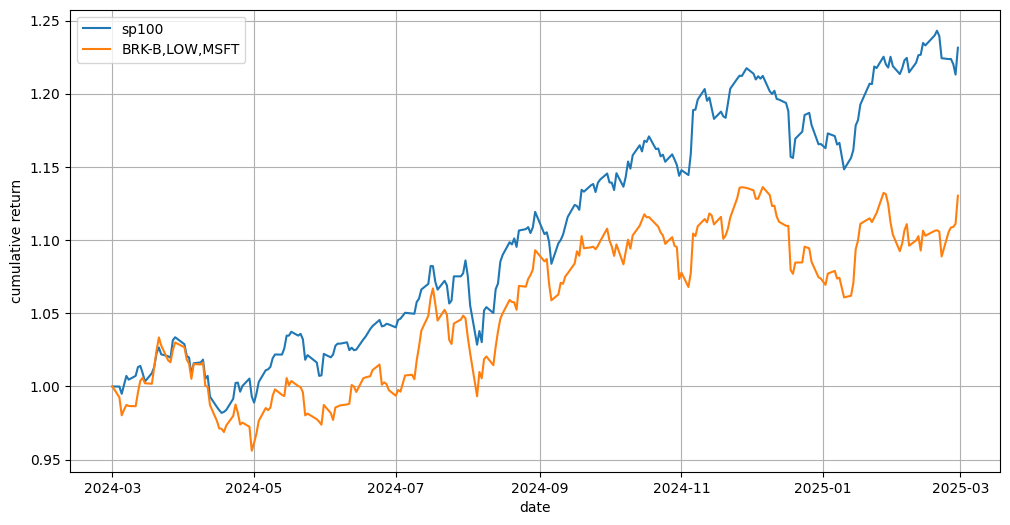

In [12]:
cumulative_index = (1 + day_mean_return).cumprod()
cumulative_portfolio = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_index, label='sp100')
plt.plot(cumulative_portfolio, label=','.join([sp100[s] for s in weights2.keys()]))
plt.xlabel('date')
plt.ylabel('cumulative return')
plt.legend()
plt.grid(True)
plt.show()